In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import os
import pickle

In [6]:
catmodel = "../testing/VGG_categorical_classifier_round2.pkl"

In [7]:
binmodel = "../VGG_binaryclassifier_v1_updated_4layers_even.smallerLR.pkl"

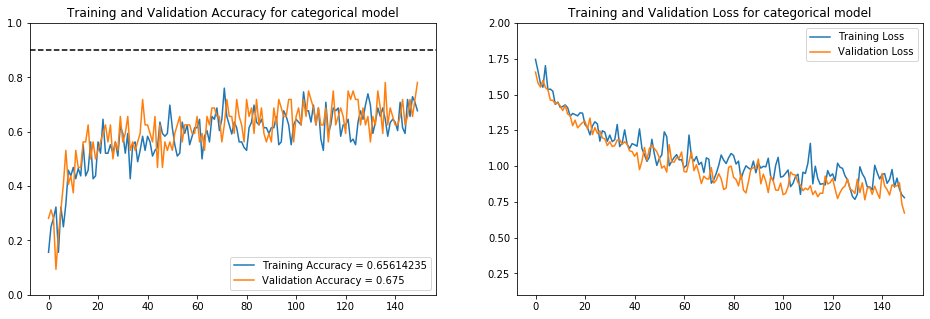

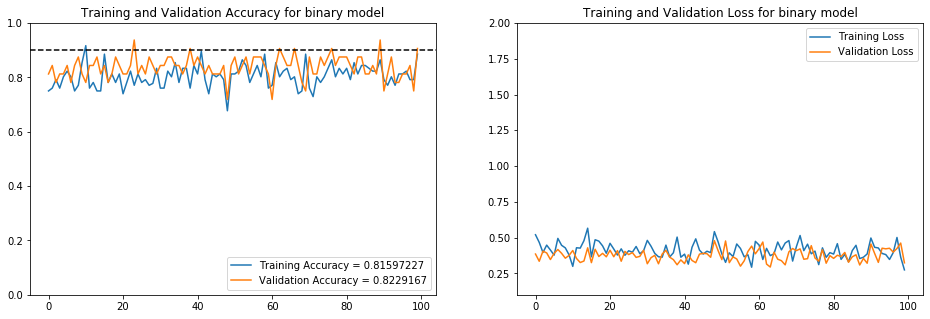

In [12]:
models = [catmodel,binmodel]
i=0
shortnames = ['categorical','binary']

for filename in models:
    pickle_off = open(filename,"rb")
    fit_history = pickle.load(pickle_off)
    title = shortnames[i]+" model"

    acc = fit_history['acc']
    val_acc = fit_history['val_acc']

    loss = fit_history['loss']
    val_loss = fit_history['val_loss']

    acc_last = np.mean(acc[-15:])
    val_acc_last = np.mean(val_acc[-15:])

    epochs_range = range(len(acc))

    plt.figure(figsize=(16, 5))
    ax1 = plt.subplot(1, 2, 1)
    line1 = plt.plot(epochs_range, acc, label='Training Accuracy = '+str(acc_last))
    line2 = plt.plot(epochs_range, val_acc, label='Validation Accuracy = '+str(val_acc_last))
    plt.ylim(0,1.0)
    ax1.axhline(0.9, color='black', linestyle='--')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy for '+title)

    ax2 = plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.ylim(0.1,2.0)
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss for '+title)
    plt.savefig('./tuning_plots/final_'+shortnames[i]+'.png')
    plt.show()
    i+=1